In [1]:
import numpy as np
import pandas as pd
from scipy import stats,spatial,sparse
from sklearn import manifold,datasets
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import scanpy as sc
import matplotlib as mpl

In [3]:
paul_Y_phate = pd.read_csv('../1_Paul/paul.Y_phate.csv',index_col=0)
paul_Y_umap = pd.read_csv('../1_Paul/paul.Y_umap.csv',index_col=0)
paul_Y_tsne = pd.read_csv('../1_Paul/paul.Y_tsne.csv',index_col=0)
paul_Y_dtne = pd.read_csv('../1_Paul/paul.Y_dtne.csv',index_col=0)
paul_Y_pca = pd.read_csv('../1_Paul/paul.Y_pca.csv',index_col=0)

In [4]:
paul_cluster_color = pd.read_csv('../1_Paul/paul.cluster_color.csv',index_col=0).values.reshape(-1)

In [5]:
paul_cluster_categories = pd.read_csv('../1_Paul/paul.cluster_categories.csv',index_col=0).values.reshape(-1)

In [6]:
paul_cluster_categories

array(['1Ery', '2Ery', '3Ery', '4Ery', '5Ery', '6Ery', '7MEP', '8Mk',
       '9GMP', '10GMP', '11DC', '12Baso', '13Baso', '14Mo', '15Mo',
       '16Neu', '17Neu', '18Eos', '19Lymph'], dtype=object)

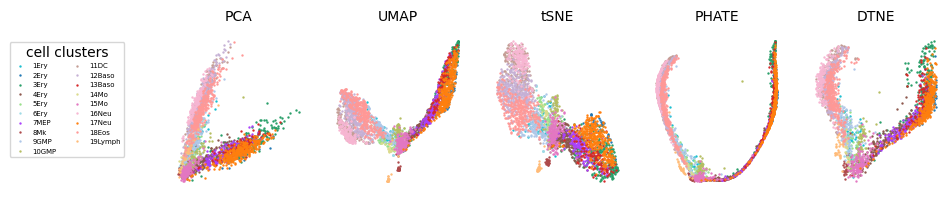

In [7]:
names = ['PCA','UMAP','tSNE','PHATE','DTNE']
name_Y = [paul_Y_pca,paul_Y_umap,paul_Y_tsne,paul_Y_phate,paul_Y_dtne]
fig,axes = plt.subplots(ncols=6,figsize=(12, 2))
recs = []
for i,ax in enumerate(axes):
    if i == 0:   
        ax0 = ax
        ax0.axis("off")
    else:
        ax.set_title(names[i-1],size=10,pad=10)
        Yd = name_Y[i-1]
        Yd['cluster_color'] = paul_cluster_color
        for color, group in Yd.groupby(['cluster_color']):
            im = ax.scatter(x=group['0'], y=group['1'],c=color, s =0.5,label=color)
        ax.axis("off")
fig.legend( list(paul_cluster_categories), loc=3, ncol=2, bbox_to_anchor=(0.12, 0.25), frameon=True, title= "cell clusters",fontsize = 5,title_fontsize=10)

In [8]:
paul_Y_phate.shape

(2730, 3)

In [9]:
panc_Y_pca = pd.read_csv('../1_pancreas/panc.Y_pca.csv',index_col=0)
panc_Y_phate = pd.read_csv('../1_pancreas/panc.Y_phate.csv',index_col=0)
panc_Y_umap = pd.read_csv('../1_pancreas/panc.Y_umap.csv',index_col=0)
panc_Y_tsne = pd.read_csv('../1_pancreas/panc.Y_tsne.csv',index_col=0)
panc_Y_dtne = pd.read_csv('../1_pancreas/panc.Y_dtne.csv',index_col=0)

In [10]:
panc_cluster = pd.read_csv('../1_pancreas/panc.clusters.csv',index_col=0).values.reshape(-1)

In [11]:
panc_cluster_set = set(panc_cluster)
panc_zip_types = zip(sorted(panc_cluster_set),range(len(panc_cluster_set)))
panc_dict_types = dict(panc_zip_types)
panc_cell_clusters  =  [panc_dict_types[i] for i in panc_cluster]

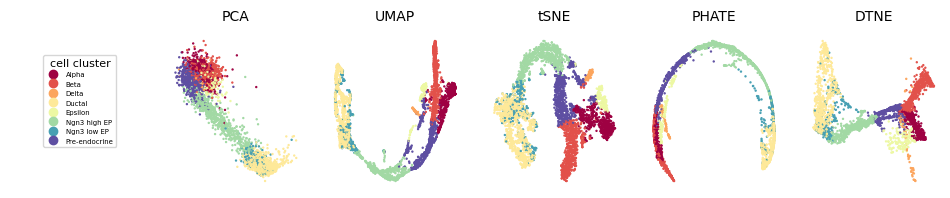

In [12]:
names = ['PCA','UMAP','tSNE','PHATE','DTNE']
name_Y = [panc_Y_pca,panc_Y_umap,panc_Y_tsne,panc_Y_phate,panc_Y_dtne]
cmap = 'Spectral'
fig,axes = plt.subplots(ncols=6,figsize=(12, 2))
for i,ax in enumerate(axes):
    if i == 0:   
        ax0 = ax
        ax0.axis("off")
    else:
        ax.set_title(names[i-1],size=10,pad=10)
        Yd = name_Y[i-1]
        scatter = ax.scatter(x=Yd['0'], y=Yd['1'],c=panc_cell_clusters, s =0.5,cmap= cmap)
        ax.axis("off")
        
handles, labels = scatter.legend_elements()
fig.legend(handles, list(sorted(panc_cluster_set)), loc=3, ncol=1, bbox_to_anchor=(0.15, 0.3), frameon=True, title= "cell cluster",fontsize = 5,title_fontsize=8)

In [13]:
panc_Y_dtne.shape

(3696, 2)

In [14]:
nest_Y_pca = pd.read_csv('../1_nestorowa/nest.Y_pca.csv',index_col=0)
nest_Y_phate = pd.read_csv('../1_nestorowa/nest.Y_phate.csv',index_col=0)
nest_Y_umap = pd.read_csv('../1_nestorowa/nest.Y_umap.csv',index_col=0)
nest_Y_tsne = pd.read_csv('../1_nestorowa/nest.Y_tsne.csv',index_col=0)
nest_Y_dtne = pd.read_csv('../1_nestorowa/nest.Y_dtne.csv',index_col=0)

In [15]:
nest_label = pd.read_csv('../1_nestorowa/nest.cell_label.csv',index_col=0).values.reshape(-1)

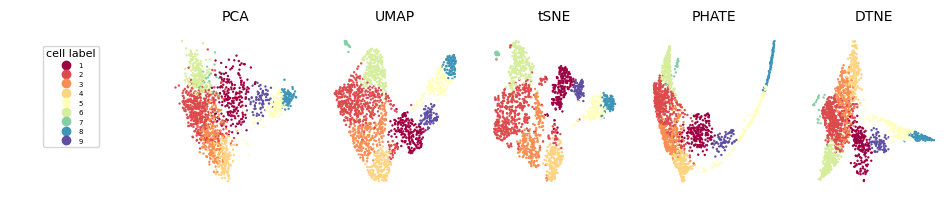

In [16]:
names = ['PCA','UMAP','tSNE','PHATE','DTNE']
name_Y = [nest_Y_pca,nest_Y_umap,nest_Y_tsne,nest_Y_phate,nest_Y_dtne]
cmap = 'Spectral'
fig,axes = plt.subplots(ncols=6,figsize=(12, 2))
for i,ax in enumerate(axes):
    if i == 0:   
        ax0 = ax
        ax0.axis("off")
    else:
        ax.set_title(names[i-1],size=10,pad=10)
        Yd = name_Y[i-1]
        scatter = ax.scatter(x=Yd['0'], y=Yd['1'],c=nest_label, s =0.5,cmap= cmap)
        ax.axis("off")
        
handles, labels = scatter.legend_elements()
fig.legend(handles, list(sorted(set(nest_label))), loc=3, ncol=1, bbox_to_anchor=(0.15, 0.3), frameon=True, title= "cell label",fontsize = 5,title_fontsize=8)

In [17]:
nest_Y_umap.shape

(1656, 2)

In [18]:
eb_Y_phate = pd.read_csv('../1_EB/eb.Y_phate.csv',index_col=0)
eb_Y_umap = pd.read_csv('../1_EB/eb.Y_umap.csv',index_col=0)
eb_Y_tsne = pd.read_csv('../1_EB/eb.Y_tsne.csv',index_col=0)
eb_Y_dtne = pd.read_csv('../1_EB/eb.Y_dtne.csv',index_col=0)
eb_Y_pca = pd.read_csv('../1_EB/eb.Y_pca.csv',index_col=0)

In [19]:
eb_cell_type = pd.read_csv('../1_EB/eb.cell_type.csv',index_col=0).values.reshape(-1)

In [20]:
eb_sample_labels = pd.read_csv('../1_EB/sample_labels.csv',index_col=0,header=None,sep=" ").values.reshape(1,-1)[0]

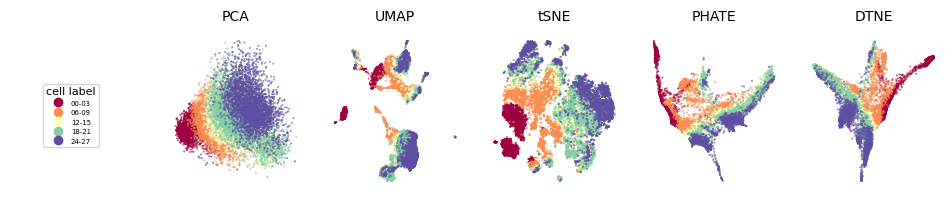

In [21]:
names = ['PCA','UMAP','tSNE','PHATE','DTNE']
name_Y = [eb_Y_pca,eb_Y_umap,eb_Y_tsne,eb_Y_phate,eb_Y_dtne]
cmap = 'Spectral'
fig,axes = plt.subplots(ncols=6,figsize=(12, 2))
for i,ax in enumerate(axes):
    if i == 0:   
        ax0 = ax
        ax0.axis("off")
    else:
        ax.set_title(names[i-1],size=10,pad=10)
        Yd = name_Y[i-1]
        scatter = ax.scatter(x=Yd['0'], y=Yd['1'],c=eb_cell_type, s =0.1,cmap= cmap)
        ax.axis("off")
        
handles, labels = scatter.legend_elements()
fig.legend(handles, list(sorted(set(eb_sample_labels))), loc=3, ncol=1, bbox_to_anchor=(0.15, 0.3), frameon=True, title= "cell label",fontsize = 5,title_fontsize=8)

In [22]:
eb_Y_umap.shape

(16821, 2)

In [23]:
rc_Y_pca = pd.read_csv("../1_COPILOT/rc.integrated.Y_pca.csv",index_col=0)
rc_Y_umap = pd.read_csv("../1_COPILOT/rc.integrated.umap_y.csv",index_col=0)
rc_Y_tsne = pd.read_csv("../1_COPILOT/rc.integrated.tsne_y.csv",index_col=0)
rc_Y_phate = pd.read_csv("../1_COPILOT/rc.integrated.phate_y.csv",index_col=0)
rc_Y_dtne = pd.read_csv("../1_COPILOT/rc.integrated.dtne_y.csv",index_col=0)

In [24]:
rc_cell_type = pd.read_csv("../1_COPILOT/rc.integrated.cell_type.csv",index_col=0).values.reshape(-1)

In [25]:
rc_clusters_set = set(rc_cell_type)
rc_zip_types = zip(sorted(rc_clusters_set),range(len(rc_clusters_set)))
rc_dict_types = dict(rc_zip_types)
rc_cell_clusters  =  [rc_dict_types[i] for i in rc_cell_type]

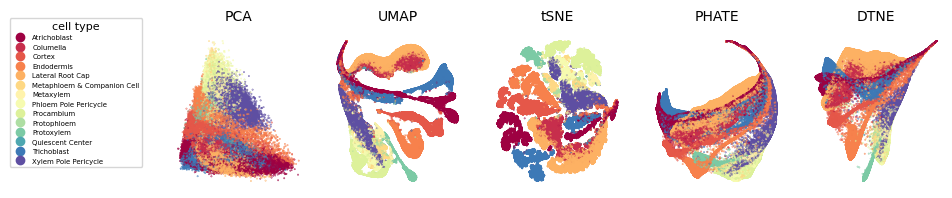

In [26]:
names = ['PCA','UMAP','tSNE','PHATE','DTNE']
name_Y = [rc_Y_pca,rc_Y_umap,rc_Y_tsne,rc_Y_phate,rc_Y_dtne]
cmap = 'Spectral'
fig,axes = plt.subplots(ncols=6,figsize=(12, 2))
for i,ax in enumerate(axes):
    if i == 0:   
        ax0 = ax
        ax0.axis("off")
    else:
        ax.set_title(names[i-1],size=10,pad=10)
        Yd = name_Y[i-1]
        im = ax.scatter(x=Yd['0'], y=Yd['1'],c=rc_cell_clusters, s =0.1,cmap= cmap)
        ax.axis("off")
        
handles, labels = im.legend_elements()
fig.legend(handles, sorted(rc_clusters_set), loc=3, ncol=1, bbox_to_anchor=(0.12, 0.2), frameon=True, title= "cell type",fontsize = 5,title_fontsize=8)

In [27]:
rc_Y_umap.shape

(110427, 2)

In [28]:
names = ['PCA','UMAP','tSNE','PHATE','DTNE']
dr_Y = [[paul_Y_pca,paul_Y_umap,paul_Y_tsne,paul_Y_phate,paul_Y_dtne],
        [nest_Y_pca,nest_Y_umap,nest_Y_tsne,nest_Y_phate,nest_Y_dtne],
        [panc_Y_pca,panc_Y_umap,panc_Y_tsne,panc_Y_phate,panc_Y_dtne],  
        [eb_Y_pca,eb_Y_umap,eb_Y_tsne,eb_Y_phate,eb_Y_dtne],
        [rc_Y_pca,rc_Y_umap,rc_Y_tsne,rc_Y_phate,rc_Y_dtne]]

In [29]:
eb_cell_type

array([1, 1, 1, ..., 5, 5, 5], dtype=int64)

In [30]:
cluster_colors = [paul_cluster_color,nest_label,panc_cell_clusters,eb_cell_type,rc_cell_clusters]
cluster_set = [paul_cluster_categories,set(nest_label),panc_cluster_set,set(eb_sample_labels),rc_clusters_set]

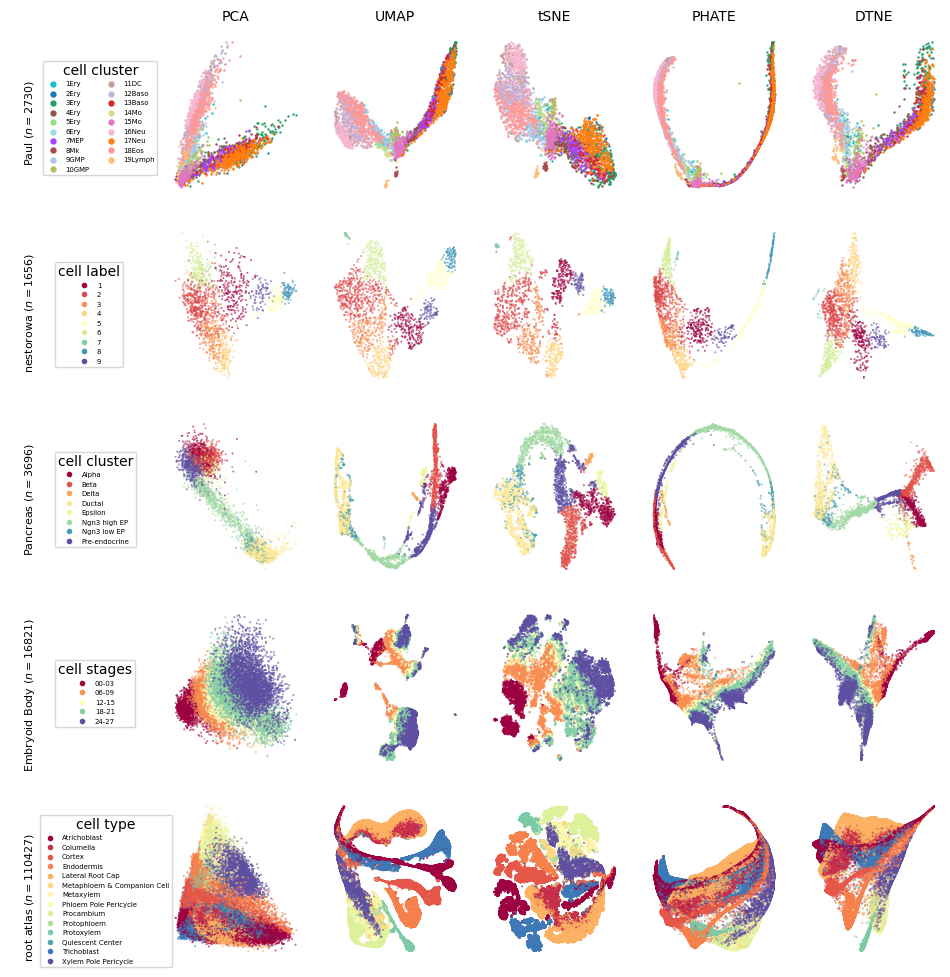

In [31]:
fig,axes = plt.subplots(nrows=5,ncols=6,figsize=(12, 12)) # fig= plt.figure(figsize=(12, 12))
for i in range(5):
    if i > 4:
        break
    for j in range(6):
        ax = axes[i,j]
        if j == 0:
            ax0 = ax
            ax0.axis("off")
        else:
            Yd = dr_Y[i][j-1]
            if i == 0:
                ax.set_title(names[j-1],size=10,pad=10)
                Yd['cluster_color'] = cluster_colors[i]
                for color, group in Yd.groupby(['cluster_color']):
                    im = ax.scatter(x=group['0'], y=group['1'],c=color,s=0.5,label=color)
            else:
                im = ax.scatter(x=Yd['0'], y=Yd['1'],c=cluster_colors[i],s =0.1,cmap= cmap)
                handles, labels = im.legend_elements()
            im.set_rasterized(True)
            ax.axis("off")
    if i == 0:
        ax0.text(0.1, 0.2, 'Paul ($n=2730$)',rotation='vertical',fontsize=8)
        fig.legend(list(paul_cluster_categories), loc=3, ncol=2, bbox_to_anchor=(0.15, 0.76), frameon=True, title= "cell cluster",markerscale=5,fontsize = 5,title_fontsize=10)
    if i == 1:
        ax0.text(0.1, 0.1, 'nestorowa ($n=1656$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.16, 0.6), frameon=True, title= "cell label",markerscale=0.5,fontsize = 5,title_fontsize=10)
    if i == 2:
        ax0.text(0.1, 0.15, 'Pancreas ($n=3696$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.16, 0.45), frameon=True, title= "cell cluster",markerscale=0.5,fontsize = 5,title_fontsize=10)
    if i == 3:
        ax0.text(0.1, 0, 'Embryoid Body ($n=16821$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.16, 0.3), frameon=True, title= "cell stages",markerscale=0.5,fontsize = 5,title_fontsize=10)
    if i == 4:
        ax0.text(0.1, 0, 'root atlas ($n=110427$)',rotation='vertical',fontsize=8)
        fig.legend(handles, sorted(cluster_set[i]), loc=3, ncol=1, bbox_to_anchor=(0.147, 0.10), frameon=True, title= "cell type",markerscale=0.5,fontsize = 5,title_fontsize=10)
        
plt.savefig('./sc_dr.png', format='png', dpi=1000)
plt.savefig('./sc_dr.pdf', format='pdf', dpi=1000)